In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
supa = pd.read_csv('supermarket_sales.csv')
supa.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
supa.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [3]:
supa.isna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
supa['Date'] = pd.to_datetime(supa['Date'])
supa['Month'] = supa['Date'].dt.month
supa['Day'] = supa['Date'].dt.day
supa.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8


In [5]:
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
lr = lm.LinearRegression()
x = supa[['Quantity']]
y = supa['Total']
lr.fit(x, y)
r2_score = lr.score(x, y)
print('Intercept:', lr.intercept_)
print('Coefficient of Quantity', lr.coef_[0])
print('R_squared:', r2_score)
print('predict:', lr.coef_[0] * 6 + lr.intercept_)

Intercept: -3.993328059358646
Coefficient of Quantity 59.33939692547344
R_squared: 0.4977446224697587
predict: 352.043053493482


#### 1. A unit increase in quantity will lead to a 0.09% increase in price ceteris paribus.
#### 2. From predict we can deduce that 6 years from now all things being equal that a unit increase in quantity will lead to a 55.71% increase in price

In [6]:
supa2 = supa['Total'].groupby(supa['Quantity']).sum()
supa2.to_frame()

,Total
Quantity,
1,6442.3485
2,10994.8020
3,16081.6950
4,25247.9220
5,27051.4125
6,34455.2040
7,43664.6595
8,40316.3040
9,48783.4515


In [7]:
prdt = supa.groupby(supa['City'])['Product line'].value_counts()
prdt.to_frame()                    

count
City      Product line                 
Mandalay  Sports and travel          62
          Fashion accessories        62
          Electronic accessories     55
          Health and beauty          53
          Home and lifestyle         50
          Food and beverages         50
Naypyitaw Food and beverages         66
          Fashion accessories        65
          Electronic accessories     55
          Health and beauty          52
          Home and lifestyle         45
          Sports and travel          45
Yangon    Home and lifestyle         65
          Electronic accessories     60
          Sports and travel          59
          Food and beverages         58
          Fashion accessories        51
          Health and beauty          47

In [8]:
prdt = supa.groupby(supa['Gender'])['Quantity'].sum()
prdt.to_frame()  

,Quantity
Gender,
Female,2869
Male,2641


<Axes: ylabel='Total'>

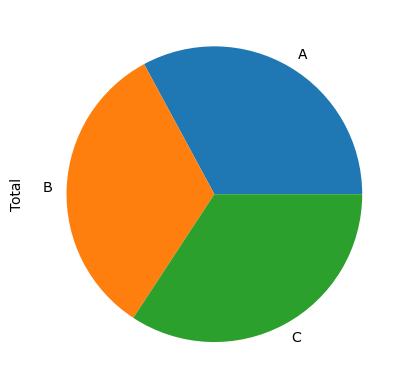

In [9]:
branch = supa.groupby(['Branch'])['Total'].sum()
branch.to_frame()
branch.plot(kind='pie')

<Axes: ylabel='Total'>

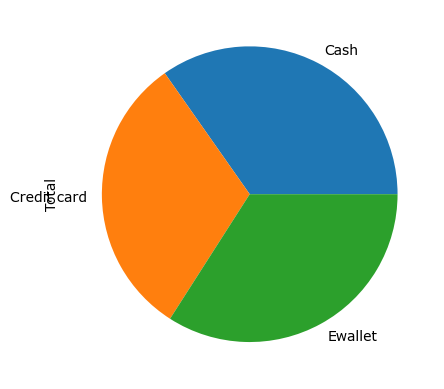

In [10]:
payment = supa.groupby(['Payment'])['Total'].sum()
payment.to_frame()
payment.plot(kind='pie')


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
supa00 = le.fit_transform(supa['Branch']) # transforms to dummy variables
supa03 = le.fit_transform(supa['Customer type']) # transforms to dummy variables

supa2 = supa['Quantity'].groupby(supa['Branch']).sum()
supa2.to_frame()
supa3 = supa['Quantity'].groupby(supa['Payment']).sum()
supa3.to_frame()

,Quantity
Payment,
Cash,1896
Credit card,1722
Ewallet,1892


Intercept: 5.726546906187626
Coefficient: -0.43396173584694586
R_squared: 0.005514296105837979
predicted variable: [5.29258517]
 PearsonRResult(statistic=-0.0742583066453721, pvalue=0.018846162930491843)


Text(0.5, 0, 'Gender')

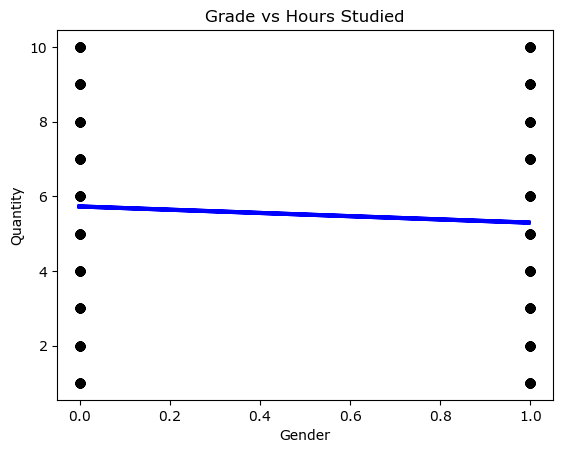

In [12]:
from scipy.stats import pearsonr
supa['Gender'] = le.fit_transform(supa['Gender']) # transforms to dummy variables
lr = lm.LinearRegression()
x = supa[['Gender']].values
y = supa['Quantity']
lr.fit(x, y)
r2_score = lr.score(x, y)
print('Intercept:', lr.intercept_)
print('Coefficient:', lr.coef_[0])
print('R_squared:', r2_score)
print('predicted variable:', lr.predict([[1]]))
print('',pearsonr(supa['Gender'], supa['Quantity']))
%matplotlib inline
supa.plot(kind='scatter', x='Gender', y='Quantity')
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Quantity')
plt.xlabel('Gender')

#### 1. The R2_squared shows that the Linear regression perfectly explains the model
#### 2. A unit inceease in 5% Tax will lead to 21% increase in Total revenue

In [13]:
supa['Gender'] = le.fit_transform(supa['Gender']) # transforms to dummy variables
x = supa[['Gender']].values
y = supa['Quantity']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.534
Date:                Sun, 22 Sep 2024   Prob (F-statistic):             0.0188
Time:                        06:09:35   Log-Likelihood:                -2488.4
No. Observations:                1000   AIC:                             4981.
Df Residuals:                     998   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7265      0.130     43.944      0.0

#### The coefficients of male suggests that being male decreases Quantity by 0.4340 (0.4%) compaired to being female which is encoded as 0.
#### The P-value which is 0.019 which is less that 0.05% significant level shows that the relationship between Gender and Quantity is significant.

In [14]:
supa['Customer type'] = le.fit_transform(supa['Customer type'])
lr = lm.LinearRegression()
x = supa[['Customer type']]
y = supa['Quantity'].values
lr.fit(x, y)
r2_score = lr.score(x, y)
print('Intercept:', lr.intercept_)
print('Coefficient:', lr.coef_[0])
print('R_squared:', r2_score)

Intercept: 5.558882235528942
Coefficient: -0.09796039184156755
R_squared: 0.00028098829878542286


In [15]:
# using ols model
supa['Customer type'] = le.fit_transform(supa['Customer type'])
x = supa[['Customer type']]
y = supa['Quantity']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2805
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.596
Time:                        06:09:35   Log-Likelihood:                -2491.1
No. Observations:                1000   AIC:                             4986.
Df Residuals:                     998   BIC:                             4996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5589      0.131     42.546

#### R squared which is 0.000 shows that there exists no significant relationship between Customer type and Quantity
#### Coefficient of Customer type shows that being a member leads to 0.098 decrease in Quantity when compared to Normal Customer type
#### The P-value which is 0.596 shows that no significant relationship exists between Customer type and Quantity.

In [16]:
supa['Payment'] = le.fit_transform(supa['Payment'])
x = supa[['Payment']]
y = supa['Unit price']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Unit price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2537
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.615
Time:                        06:09:36   Log-Likelihood:                -4695.3
No. Observations:                1000   AIC:                             9395.
Df Residuals:                     998   BIC:                             9404.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.1812      1.313     42.787      0.0

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.792e+32
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        06:09:36   Log-Likelihood:                 19517.
No. Observations:                 700   AIC:                        -3.903e+04
Df Residuals:                     696   BIC:                        -3.901e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.061e-13   3.55e-14      5.801      0.0

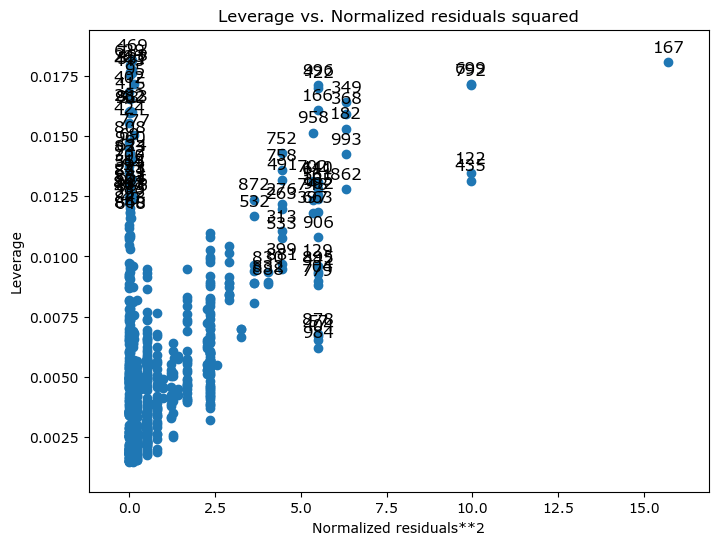

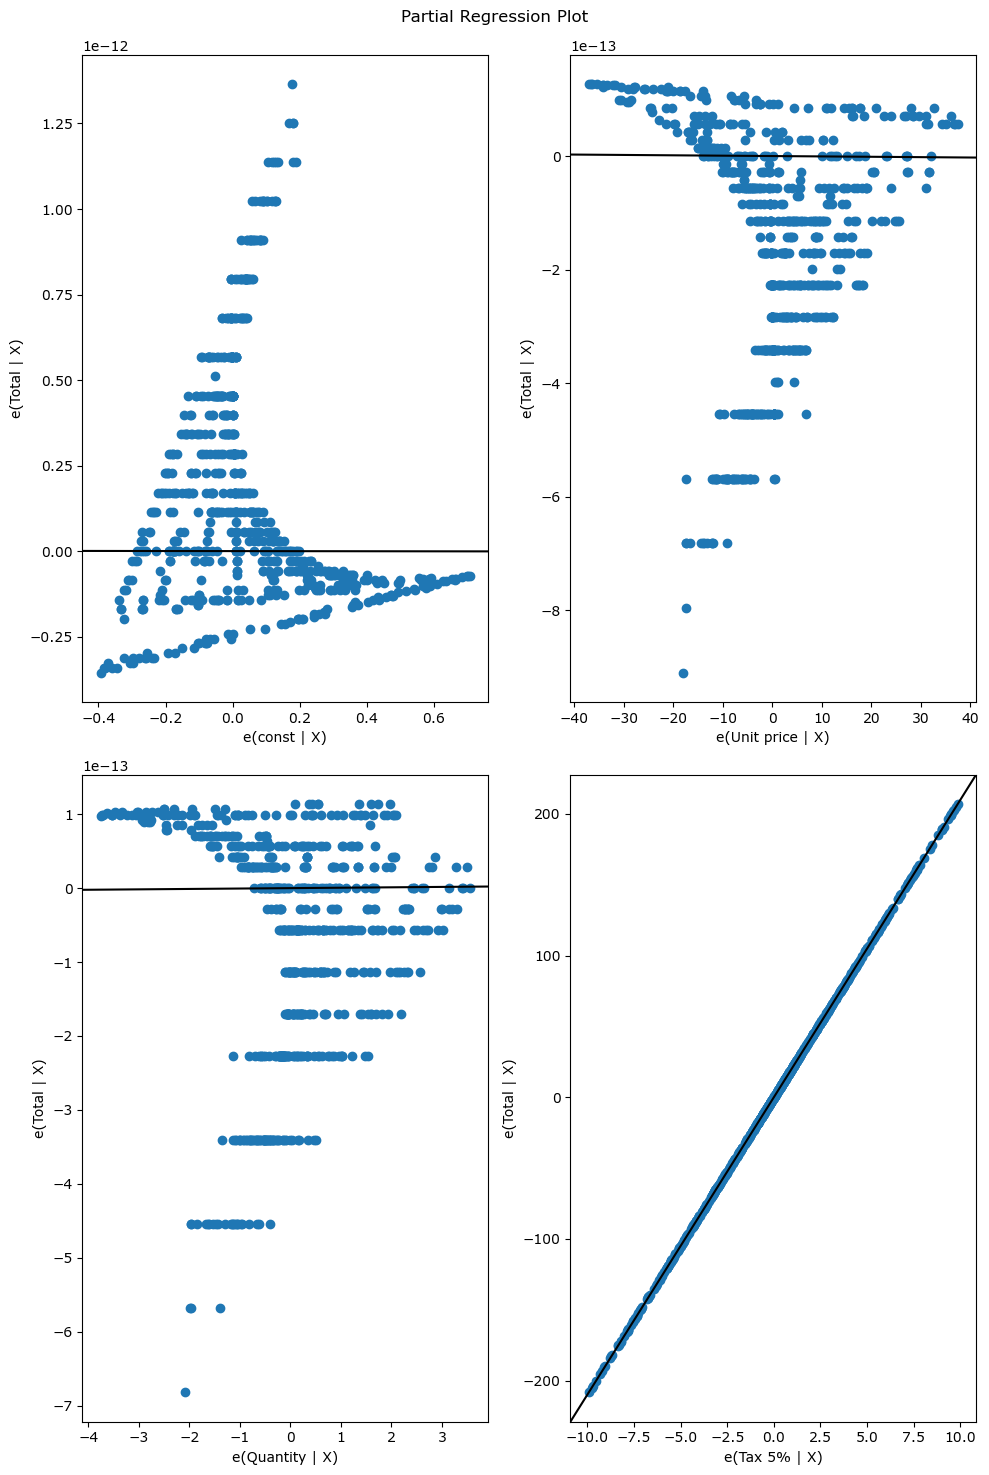

In [17]:
independent_variables = ['Unit price','Quantity','Tax 5%']
X = supa[independent_variables]
y = supa['Total']
# Split your data set into 80/20 for train/test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70,
random_state=42)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

# To check for multicollinearity
print(x.corr())

# To check for outliers (independent variables) affecting the model
# lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)


#linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.898
Date:                Sun, 22 Sep 2024   Prob (F-statistic):              0.128
Time:                        06:09:37   Log-Likelihood:                -2488.3
No. Observations:                1000   AIC:                             4985.
Df Residuals:                     996   BIC:                             5004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6479      0.265     21.278      0.0

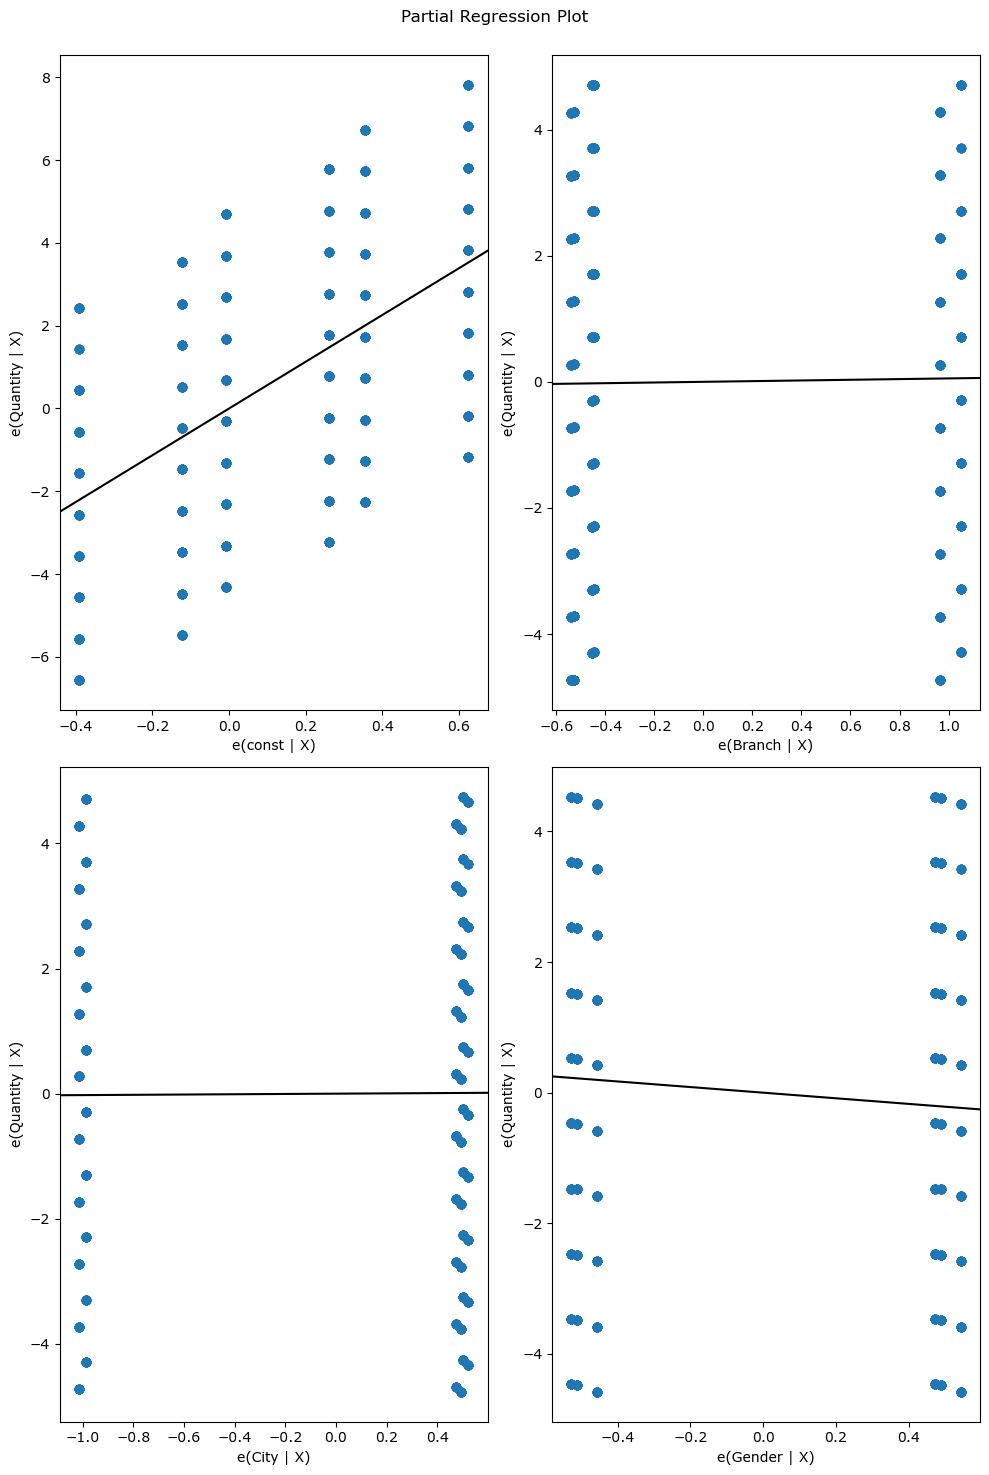

In [18]:

supa['Branch'] = le.fit_transform(supa['Branch'])
supa['City'] = le.fit_transform(supa['City'])
supa['Product line'] = le.fit_transform(supa['Product line'])

x_encoded = ['Branch','City','Gender']
x = supa[x_encoded]
y = supa['Quantity']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())
print(x.corr())
# linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
# instantiate a logistic regression model, and fit with X and y
X = supa[['Quantity','Unit price']]
y = supa['Gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
#Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.495
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.56      0.52        96
           1       0.52      0.43      0.47       104

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.49      0.49       200

[[54 42]
 [59 45]]


#### The confusion matrix and classification report indicate the model's performance, with precision, recall, and f1-score around 0.45, suggesting the model is not very effective at distinguishing between genders based on these features.

# TIME SERIES ANALYSIS

In [20]:
day1 = supa.groupby(['Month','Day'])['Quantity'].sum()
day1.to_frame()

Quantity
Month Day          
1     1          81
      2          48
      3          37
      4          32
      5          55
...             ...
3     26         52
      27         45
      28         48
      29         54
      30         67

[89 rows x 1 columns]

#### Which month has the most sales


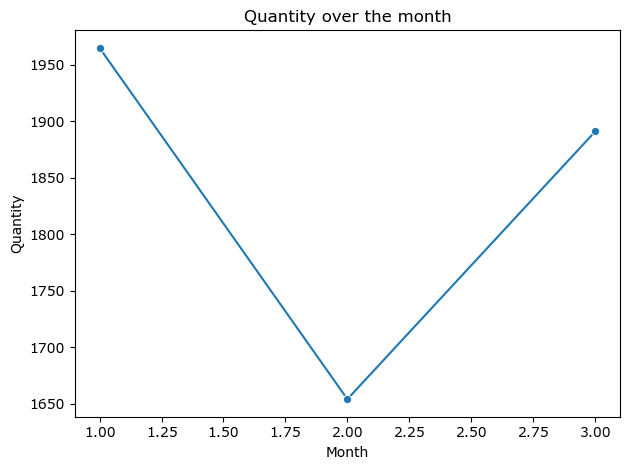

In [21]:
import seaborn as sns
monthly_quantities = supa.groupby(['Month'])['Quantity'].sum().reset_index()
x = supa['Month']
y = supa['Quantity']
sns.lineplot(x='Month', y='Quantity', data=monthly_quantities, marker='o')
plt.xlabel("Month")  # add X-axis label
plt.ylabel("Quantity")  # add Y-axis label
plt.title("Quantity over the month")  # add title
plt.tight_layout()
plt.show()

##### From the result above sales deeped in the month february as compared to other months

### SALES CHART OF THE MONTH

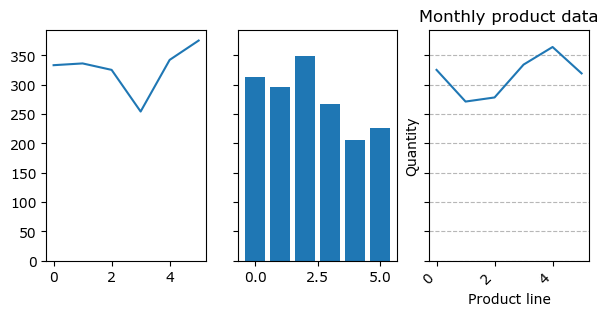

In [22]:
# filter January product line quantity
df_jan = supa[supa['Date'].dt.month == 1]
df_feb = supa[supa['Date'].dt.month == 2]
df_march = supa[supa['Date'].dt.month == 3]
df_jan_prodtline = df_jan.groupby('Product line')['Quantity'].sum().reset_index()
df_feb_prodtline = df_feb.groupby('Product line')['Quantity'].sum().reset_index()
df_march_prodtline = df_march.groupby('Product line')['Quantity'].sum().reset_index()
fig, axs = plt.subplots(1, 3, figsize=(7, 3), sharey=True)
axs[0].plot(df_jan_prodtline['Product line'], df_jan_prodtline['Quantity'])
axs[1].bar(df_feb_prodtline['Product line'], df_feb_prodtline['Quantity'])
axs[2].plot(df_march_prodtline['Product line'], df_march_prodtline['Quantity'])
plt.xlabel('Product line')
plt.ylabel('Quantity')
plt.title('Monthly product data')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

In [23]:

# One-hot encode the payment type column
payment_types = pd.get_dummies(supa['Payment'], drop_first=True)

# Define the independent variable (X) and dependent variable (y)
X = payment_types
y = supa['Quantity']

# Create and fit the linear regression model
model = lm.LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient for e-wallet:", model.coef_[0])
print("Coefficient for credit:", model.coef_[1])

# Predict quantity for each payment type
ewallet_pred = model.predict([[1, 0]])
credit_pred = model.predict([[0, 1]])
cash_pred = model.predict([[0, 0]])
print("Predicted quantity for e-wallet:", ewallet_pred[0])
print("Predicted quantity for credit:", credit_pred[0])
print("Predict quantity for cash:", cash_pred[0])



Intercept: 5.511627906976744
Coefficient for e-wallet: 0.025349584984670406
Coefficient for credit: -0.027569935962252053
Predicted quantity for e-wallet: 5.536977491961415
Predicted quantity for credit: 5.484057971014492
Predict quantity for cash: 5.511627906976744


In [24]:


# Define features (X) and target (y)
X = supa[['Gender', 'Product line']]
y = supa['Quantity']  # assuming 'Quantity' is your target variable (0/1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get coefficients
print("Coefficients:")
print(model.coef_)

# Get intercept
print("Intercept:")
print(model.intercept_)


Accuracy: 0.095
Classification Report:
              precision    recall  f1-score   support

           1       0.10      0.45      0.17        20
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00        24
           7       0.06      0.05      0.05        19
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        15
          10       0.09      0.41      0.15        22

    accuracy                           0.10       200
   macro avg       0.03      0.09      0.04       200
weighted avg       0.03      0.10      0.04       200

Confusion Matrix:
[[ 9  0  0  0  0  0  3  0  0  8]
 [ 5  0  0  0  0  0  2  0  0  9]
 [ 4  0  0  0  0  0  2  0  0  9]
 [12  0  0  0  0  0  1  0  0 12]
 [12  0  0  0  0  0  0  0  0 12]
 [ 8  0  0  0  0  0

/private/var/containers/Bundle/Application/D721E0D6-082D-4E31-B46E-9646375762C3/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/private/var/containers/Bundle/Application/D721E0D6-082D-4E31-B46E-9646375762C3/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/private/var/containers/Bundle/Application/D721E0D6-082D-4E31-B46E-9646375762C3/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricW